# Tutorial: Overfitting/Underfitting and Bias/Variance

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F03_tutorial_overfitting_underfitting_bias_variance.ipynb)

Tutorial to the class [Overfitting/Underfitting and Bias/Variance](03_overfitting_underfitting_bias_variance.ipynb) 

<div class="alert alert-block alert-info">
    <b>Tutorial Objectives</b>
    
- Evaluate model performance by estimating the Expected Prediction Errors (EPE) using test data.
- Same as above but with cross-validation.
- Compute and plot learning curves.
- Estimate the irreducible error and bias error.
- Improve the models by modifying the input features.
</div>

<div class="alert alert-block alert-warning">

We are going to study the temperature variations in the upper part of the equatorial ocean. Our goal is to get an estimate of the temperature as a function of depth $T = f(z)$. We are going to suppose that $f$ is linear such that $T = \alpha z + \beta$. 

</div>

## Argo profiles

To measure temperature and salinity in the ocean, the scientific community has deployed Argo Floats in all ocean basins. Argo floats look like cylinders that can adjust their density (like a submarine). They are programmed to go up and down in the ocean and measure temperature, salinity and pressure along their path. The figure below is an illustration of a typical work cycle of such a float. **Each time the Argo float moves up, it records a profile**, as illustrated in the figure below.

<img alt="Argo" src="images/argo.jpg" width="750">
Figure from Walczowski et al (2020)

### Download the data

We are going to analyze the data taken from one argo float

> ***Question***
> - Check in the `data` folder that you have a file named `nodc_13858_prof.nc`.
> - If not, you can download it from `https://data.nodc.noaa.gov/argo/gadr/data/aoml/13858/nodc_13858_prof.nc` and place it in the `data` folder. (as in [Tutorial 1](01_introduction.ipynb))


### Information about the data

- The dataset contains 48 profiles of temperature, salinity recorded at predefined pressure levels near the Equator in the Atlantic ocean : Lat: +2 deg, longitude; Lon: -14 deg. It is a subset of the  [Argo dataset](https://argo.ucsd.edu/data/)


- In our subset, there are `n_prof = 48` vertical profiles recorded between July 1997 and December 1998. At the equator, there is *no seasonal cycle* so that *all profiles are from the same distribution*. Each profile should be considered as *one coherent sample*.


- We are going to suppose that pressure in decibar is equivalent to depth in meters.


- We will focus on the upper part of the ocean (upper 100 m) which corresponds to the first 15 measurements of each profile


## Getting ready

In the cell below we import the main libraries and load the dataset in the `ds` object. We extract a subsample of pressures (depths) and temperatures that we store in the variables `x_pres` and `y_temp` respectively.  These are 2d arrays where each row correspond to one individual profile.

In [2]:
# Path manipulation module
from pathlib import Path
# Numerical analysis module
import numpy as np
# Formatted numerical analysis module
import pandas as pd
# Plot module
import matplotlib.pyplot as plt
# read netCDF files
import xarray as xr


# Set data directory
data_dir = Path('data')
argo_filename = 'nodc_13858_prof.nc'
argo_filepath = Path(data_dir, argo_filename)

# name of the temperature and pressure variables in the netcdf file
var_temp = 'temp' 
var_pres = 'pres'

# load the data
ds = xr.open_dataset(argo_filepath)

n_prof = int(ds['n_prof'][-1]) + 1
print(f'There are {n_prof} profiles in this dataset')

n_max = 15
print(f'For each profile, we are going to keep only the first {n_max} measurements')

x_pres = ds[var_pres].values[:,:n_max]
y_temp = ds[var_temp].values[:,:n_max]

print(ds[var_pres].units), print(ds[var_temp].units)


There are 48 profiles in this dataset
For each profile, we are going to keep only the first 15 measurements
decibar
degree_Celsius


(None, None)


> ***Question***
> - Check in the `ds` object that the unit of temperature is degree Celsius and the unit of pressure is decibar. In the remainder of the tutorial, we will consider that the pressure in decibar is equivalent to the depth in meters.
> - Pick the first profile `ip = 0`, and plot the temperature as a function of depth. Don't forget the labels!

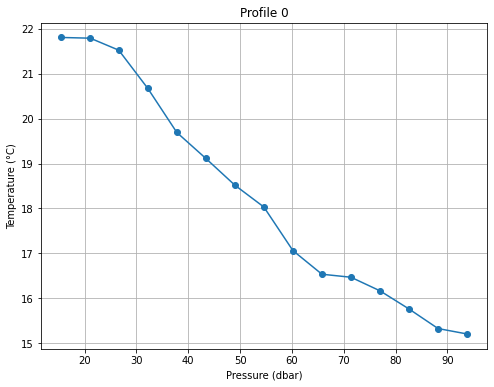

In [3]:
# your answer here
ip=0
plt.figure(figsize=(8,6))
plt.plot(x_pres[ip,:],y_temp[ip,:], '-o')
plt.ylabel('Temperature (°C)')
plt.xlabel('Pressure (dbar)')
plt.title(f'Profile {ip}')
plt.grid()
plt.show()

> ***Question***
> - Do a linear regression to estimate the coefficients $\alpha$ and $\beta$ (as explained above) with this profile as training data.

In [4]:
from sklearn import linear_model as lm
x1=x_pres[ip,:][:,None]
y1=y_temp[ip,:]
reg=lm.LinearRegression()
reg.fit(x1, y1)
b=reg.intercept_
a=reg.coef_[0]
print("intercept b=",b)
print("slope a=",a)

intercept b= 23.403849
slope a= -0.094458856


> ***Question***
> - Plot your linear regression on top of the raw data. Don't forget the labels

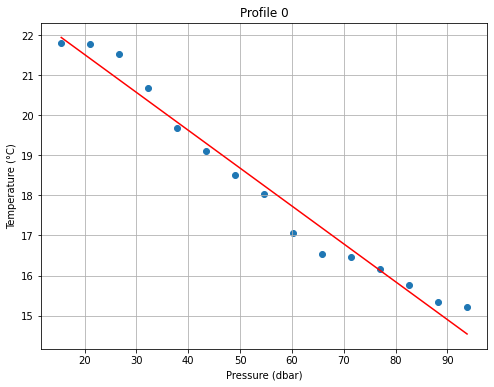

In [5]:
x1_pred=reg.predict(x1)
plt.figure(figsize=(8,6))
plt.scatter(x_pres[ip,:],y_temp[ip,:])
plt.plot(x1,x1_pred, 'r-')
plt.ylabel('Temperature (°C)')
plt.xlabel('Pressure (dbar)')
plt.title(f'Profile {ip}')
plt.grid()
plt.show()


> ***Question***
> - What is the training score $R^2$ for this linear regression?
> - What do you think of this value of $R^2$?

In [6]:
r2=reg.score(x1,y1)
print("R^2=",r2)

R^2= 0.9720957279205322


your answer here

> ***Question***
> - Select a random profile `ip2` between `1` and `n_prof -1`.
> - We are going to use this new profile as testing set. What is the testing score $R^2$?
> - Are you overfitting?  Justify your answer

In [7]:
# your answer here
ip2 = int(np.random.rand()*(n_prof - 2)) + 1
x2= x_pres[ip2,:][:,None]
y2= y_temp[ip2,:]
print('R2=',reg.score(x2,y2))

print(f"Working with profile number: ip2 = {ip2}")

R2= -0.12781083583831787
Working with profile number: ip2 = 19


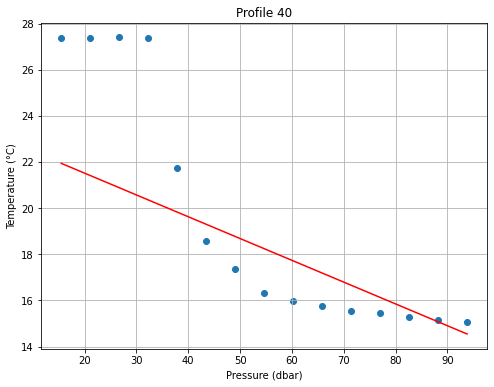

In [77]:
x2_pred=reg.predict(x2)
plt.figure(figsize=(8,6))
plt.scatter(x2,y2)
plt.plot(x2,x2_pred, 'r-')
plt.ylabel('Temperature (°C)') 
plt.xlabel('Pressure (dbar)')
plt.title(f'Profile {ip2}')
plt.grid()
plt.show()   

## Learning curve

In general, there are two possible reasons that can explain the fact that we are overfitting the data. Either we do not have enough data or the model is to complicated. Since linear regression is one of the simplest possible models, we will focus more on the amount of data needed to extract a general law for this problem. This can be achieved with a learning curve.

### What is a sample?

A key assumption regarding datasets is that each point should be Independent Identically Distributed (also noted [*iid*](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables)). This is in practice rarely true and in fact, for our dataset, this is clearly not the case because the points within a profile are correlated (i.e. not independent). There are then two possible approaches

- Treat each profile as a coherent block of data (the new sample size is then a whole profile rather than one data point)
- Shuffle the entire data set

In this tutorial, we will adopt the first strategy to design well balanced **training** and **testing** sets. So keep in mind that for this example ***one sample = one profile***. Note that this type of consideration is not specific to this dataset: if you are aware of a pre-existing structure (seasonality, space proximity, etc), you will need to keep it in mind to build your train and test data.



> ***Question***
> - Compute and plot a learning curve. To do so:
>   - Partition your dataset into `n_train` samples for training and `n_test  = n_prof - n_train` samples for testing.
>   - Define a list of train period of increasing lengths
>   - Loop over these train periods to iteratively:
>     - Select data for this train period
>     - Train the model
>     - Compute the train error from the train data for the train period
>     - Compute the test error from the test data for the test period
>     - Save both errors
>   - Plot both errors curves
> - Interpret the results.

In [ ]:
n_prof=ds.dims['n_prof']
n_train=30
n_test=n_prof-n_train

X_train=x_pres[:n_train,:].flatten()[:,None]
y_train=y_temp[:n_train,:].flatten()
X_test=x_pres[n_train:,:].flatten()[:,None]
y_test=y_temp[n_train:,:].flatten()
R2_train=np.zeros(n_train+1)
R2_test=np.zeros(n_train+1)

for i in range(1,n_train+1)


## Estimating the expected prediction error with cross-validation

> ***Question***
> - Perform a $k$-fold cross-validation of your own by repeating the above estimation of the test error on all samples. To do so:
>   - Use the `split` method of a `sklearn.model_selection.KFold` object initialized with the `n_splits` option to get a sequence train and test indices over which to loop.
>   - For each pair of train and test indices:
>     - Select the train and test data from the input and output data;
>     - Fit the model using the train data;
>     - Use the fitted model to predict the target from the test inputs;
>     - Estimate the $R^2$ from the test output.
>   - Average the $R^2$ estimates.

In [ ]:
import sklearn.model_selection as ms


> ***Question***
> - Verify your results using the `cross_val_score` function of `sklearn.model_selection` with the appropriate value for the `cv` option.
> - How does the $R^2$ estimate from the cross-validation compare to your estimation above?

In [80]:
# answer cell


Answer: 

## Irreducible error, Bias error

This data set is special because all measurements are at the same depth. We can use this property to measure specific quantities such as the irreducible error or the bias error.

> ***Question***
> - In one single figure, plot:
>    - All sample points with small dots
>    - The mean temperature at each depth
>    - your best linear regression
>  - Propose a graphical interpretation for the irreducible error and the bias error
>  - Where can you read the irreducible error on the learning curve?

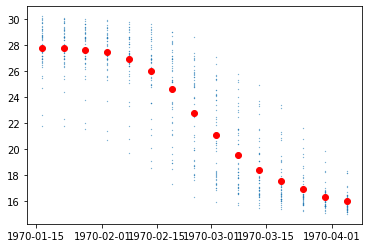

In [90]:
# your answer here
X=x_pres.flatten()[:,None]
Y=y_temp.flatten()
Y_mean=np.mean(y_temp, axis=0)

plt.plot(X,Y,'.', markersize=0.5)
plt.plot_date(x_pres[1,:],Y_mean,'ro')
plt.show()

> ***Question***
> - In order to verify that the data is Independent Identically Distributed, plot the variance of the temperature at each depth.
> - What do you conclude?

## Beyond a linear model

We consider the full depth of the ocean and so do no restrict ourselves to the first 100 m.

> ***Question***
> - Look at the whole temperature data. Two profiles have a lot of NaNs. Remove them. What would be a good depth to keep as many data points as possible?
> - Do a linear regression for the full dataset and plot it. Do you observe a bias error?
> - Add input features in the form of powers of $z$ and use the linear regression method of scikit-learn to fit a function of the type $f(z) = a_0 + a_1 z + a_2 z^2 ...$. Do you observe a reduction of the bias?
> - Do you think that with this dataset, going from a linear fit to a polynomial fit will increase the variance error? why? 

In [82]:
# your answer here

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.
Several slides and images are taken from the very good [Scikit-learn course](https://inria.github.io/scikit-learn-mooc/).

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>